<center><h1>IFT-6758  Data Science</h1></center>
<center><h2>Fall - 2020</h2></center> 
<center><h3>Homework - 1</h3></center> 
<center><h2>Matteo Esposito</h2></center> 



[Notebook](https://colab.research.google.com/drive/10YQ90z1TM36VJE-1PQ1FnqgjNMpdfiqA) due October 11, 2020 at [23.59 EDT](https://www.worldtimebuddy.com/?qm=1&lid=6077243&h=6077243&date=2020-10-11&sln=23-24) as **PDF** on [Gradescope](https://www.gradescope.com/courses/179325/assignments/714271)


In [1]:
#@title Imports (Run this cell first)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

%matplotlib inline
warnings.simplefilter(action="ignore", category=pd.core.common.SettingWithCopyWarning)

path = 'https://raw.githubusercontent.com/Jhelum-Ch/DataScience_IFT6758/gh-pages/media/{}'

## Data Wrangling

#### Q1

**7 points** = $(2 + 2 + 1 + 2)              $

Given below is the code to load a dataset with the population of different geographical regions in Canada. 

(a) Visualize the distribution of the `population` column using an appropriate histogram. Does the distribution resemble any well-known distribution? What aspect of the data causes this shape of the distribution?

(b) A common strategy is to transform the data to bring it closer to a better distribution. Try out the following transformations and *visually* determine if any of them lead it closer to another well-known distribution. **Name the distribution(s) if it is different from (a)**:

> 1.   $\sqrt{population}$
> 2.   $log_{10}(1+population)$

(c) What difference do you think the above `log` transfomation makes with `1 + population` as opposed to `population`?

(d) Try out the same `log` transfomation in (c) with different values of the base of the `log`. What difference do you observe when you change the base? 



In [2]:
pop_df = pd.read_csv(path.format('canada-population.csv'))

(a)

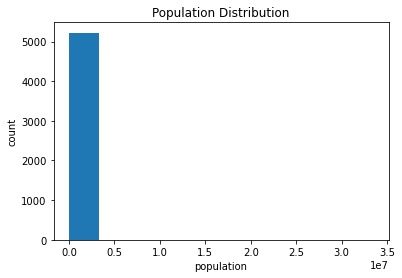

In [3]:
plt.hist(pop_df['population'])
plt.plot()

plt.xlabel("population")
plt.ylabel("count")
plt.title("Population Distribution")
plt.show()

In [43]:
# Here we modify the data to have a maximum cutoff value at the natural 3rd quartile to remove the effect of very large utliers on our 
# visualization of the distribution of data.
pop_df['population_cutoff'] = np.where(pop_df['population']>2049.5, 2049.5, pop_df['population'])

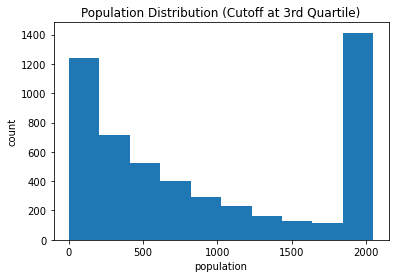

In [5]:
plt.hist(pop_df['population_cutoff'])
plt.plot()

plt.xlabel("population")
plt.ylabel("count")
plt.title("Population Distribution (Cutoff at 3rd Quartile)")
plt.show()

Our data could be considered to resemble a gamma distribution. Generally speaking, it is extremely left skewed.

(b)

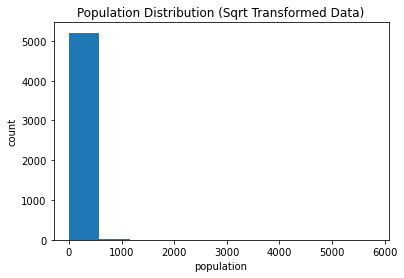

In [6]:
plt.hist(np.sqrt(pop_df['population']))
plt.plot()
plt.xlabel("population")
plt.ylabel("count")
plt.title("Population Distribution (Sqrt Transformed Data)");

This distribution resembles our non-transformed data distribution.

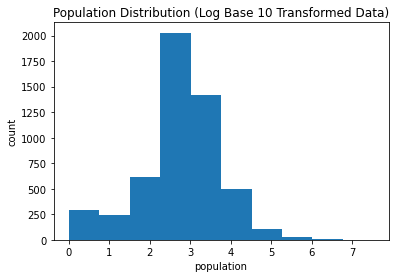

In [7]:
plt.hist(np.log10(1+pop_df['population']))
plt.plot()
plt.xlabel("population")
plt.ylabel("count")
plt.title("Population Distribution (Log Base 10 Transformed Data)");

The log-transformed data looks very much like a Normal distribution.

(c) We have to add 1 to our population data in the log transform since we have many 0 values. Since log(0) is undefined, we need to artificially add a constant to our data to include the most amount of points in our analysis/visualization possible. The effect of this +1 term is negligeable when we get to higher magnitude population values therefore it should not influence the final interpretation.

(d)

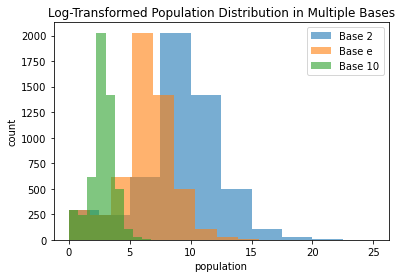

In [8]:
plt.hist(np.log2(1+pop_df['population']), alpha=0.6, label='Base 2')
plt.hist(np.log(1+pop_df['population']), alpha=0.6, label='Base e')
plt.hist(np.log10(1+pop_df['population']), alpha=0.6, label='Base 10')
plt.plot()

plt.legend(loc='upper right')
plt.xlabel("population")
plt.ylabel("count")
plt.title("Log-Transformed Population Distribution in Multiple Bases");

The base chosen is proportional to the mean and std deviation of the normal distribution of the log-transformed data. In other words, if we increase the base of our logarithm, we increase the mean and std deviation of the resulting Normal distribution.

## Exploratory Analysis

####Q2

**9 points** = $(1 + 1.5 + 3 + 2 + 1.5)$

The next cell loads the fancy penguins dataset into a dataframe.

(a) Remove the rows that have `NaN` values for all numerical features except `body_color`. 

(b) In the result obtained in (a), how many penguins have no `body_color` assigned? Replace these `body_color` entries with a string type `unknown` 

(c) Visualize this data in a pair plot and guess the possible `body_color` of the penguins with no species assigned.**Justify** your choice.

(d) Load the dataset afresh again. Replace the `NaN` values present in the the features with their respective *in-class means* for all numerical fields. Example: The  `bill_depth_mm` of an `Adelie	Torgersen` penguins replaced with the mean of `bill_depth_mm` of all the other `Adelie	Torgersen` entries, and so on for all fields. 

(e) Plot the pair plot of this transformed dataset. Make any comment(s) on what you observe here compared to (c).




In [44]:
penguins = pd.read_csv(path.format('fancy-penguins.csv'))
penguins = penguins.drop(columns=["Unnamed: 0"]).copy()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,body_color
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,black
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,grey
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,grey
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,grey


(a)

In [45]:
nonan = penguins.dropna(subset=[x for x in penguins.columns if x != "body_color"])
nonan.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,body_color
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,black
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,grey
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,grey
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,grey
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,black


In [46]:
# Here we show that we removed all nulls except for those in body_color.
nonan.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
body_color           9
dtype: int64

(b)

In [11]:
nonan['body_color'].value_counts(dropna=False)

black    168
grey     165
NaN        9
Name: body_color, dtype: int64

We have 9 observations with no body_color assigned

In [47]:
nonan.loc[:, 'body_color'].fillna(value="unknown", inplace=True)
nonan['body_color'].value_counts()

black      168
grey       165
unknown      9
Name: body_color, dtype: int64

(c)

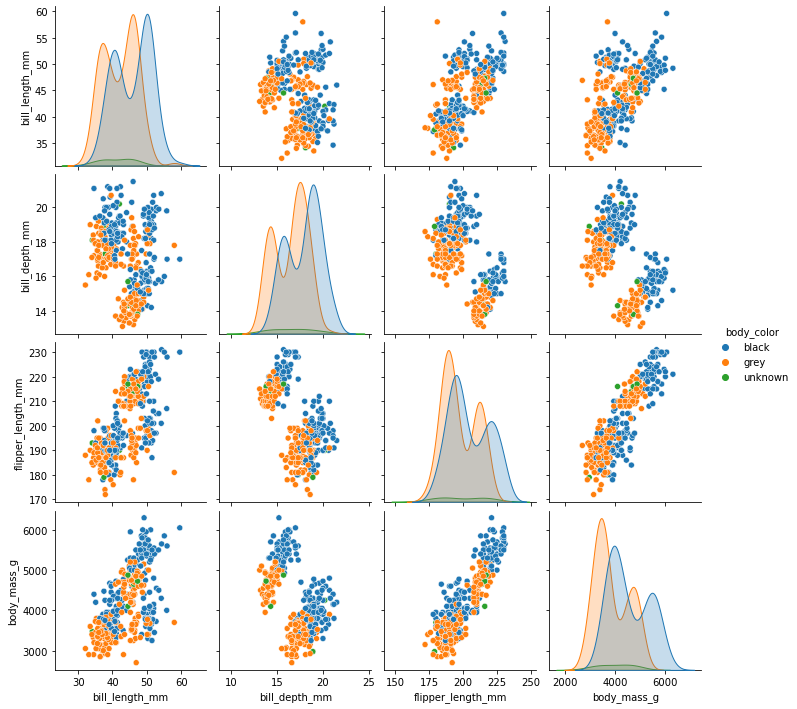

In [13]:
sns.pairplot(nonan, hue="body_color")

<AxesSubplot:xlabel='body_mass_g', ylabel='bill_depth_mm'>

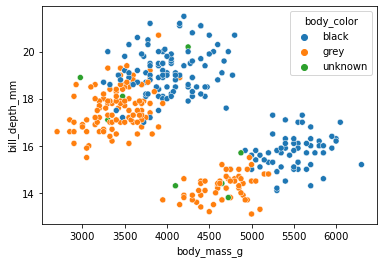

In [14]:
sns.scatterplot(data=nonan, x='body_mass_g', y='bill_depth_mm', hue="body_color")

Using the pairplot, we are able to narrow down 1 specific combination of variables that is telling of what color the unknown body_color observations might have. Comparing body_mass_g and bill_depth_mm we can see that the large majority of the unknown body_color observations are spread throughout the densely packed areas of orange points (Grey color). Therefore, it is likely that the unknown colors are in fact grey.

(d)

In [15]:
penguins = pd.read_csv(path.format('fancy-penguins.csv'))
penguins = penguins.drop(columns=["Unnamed: 0"]).copy()

In [16]:
penguins[penguins['bill_depth_mm'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,body_color
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


Our NaN observations belong to the species/island combinations of Adelie-Torgersen and Gentoo-Biscoe. Lets get those averages.

In [17]:
AT_filter = (penguins['species'] == 'Adelie') & (penguins['island'] == 'Torgersen')

In [18]:
GB_filter = (penguins['species'] == 'Gentoo') & (penguins['island'] == 'Biscoe')

In [19]:
for filt in [AT_filter, GB_filter]:
    penguins[filt] = penguins[filt].fillna(penguins[filt].mean())

(e)

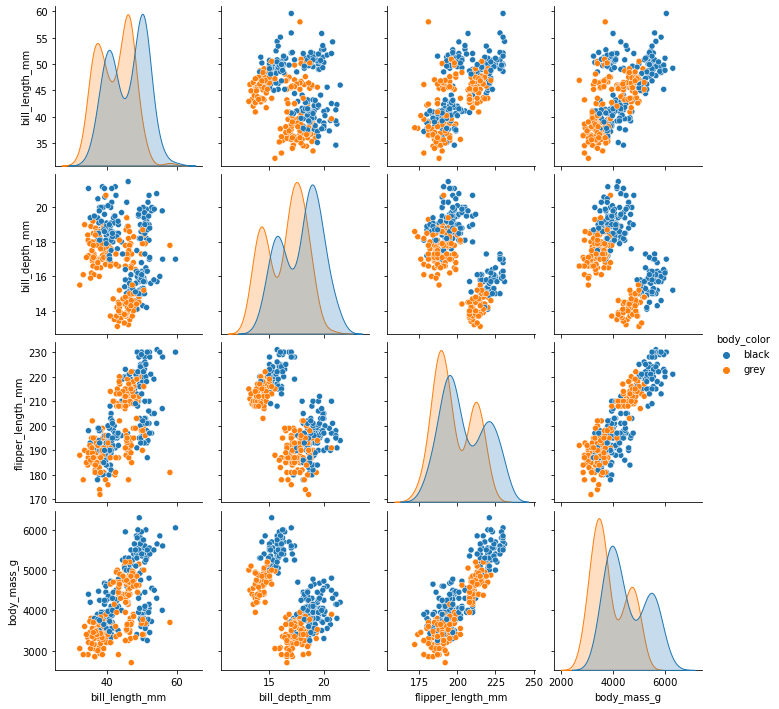

In [20]:
sns.pairplot(penguins, hue="body_color")

Comparing the two pairplots, we can see that the unidentified green/unknown penguins have been mostly grouped with the orange/grey group. Otherwise, there are no additional insights from this renewed pairplot.

## Data Visualization

####Q3

**13 points** = $(3*1 + 3*2 + 3 + 1)              $




In this problem, the task is to visualize the data about the number of taxi pickups in a city at different time scales. The dataset contains details of taxi pickups during several months. 

Observe the datatype of the field indicating the trip start timestamp. A lot of information can be extracted from just that string.

(a) Extract the following from the trip start timestamp and add new columns to store them in the dataframe : 
* day of the month (1-31)
* day of the week (Monday-Sunday)
* hour of the day

(b) Produce suitable plots through code to observe the following relationships and give a single line comment about the taxi usage pattern of the city residents in the mentioned context. 

  1. The number of rides by day of the month.
  2. The number of rides by the day of the week. 
  3. The number of hourly rides during the day.
  
(c) On a single plot, depict the taxi usage during different times of the day for cash and credit card rides. Add a suitable legend and label the axes.  

(d) Overall it was noted that there were substantially more credit card rides than cash rides. Is this true throughout the day?

In [48]:
trips = pd.read_csv(path.format('city-taxi.csv'))

(a)

In [49]:
trips['day'] = pd.DatetimeIndex(trips['trip_start_timestamp']).day

trips['dayofweek'] = pd.DatetimeIndex(trips['trip_start_timestamp']).dayofweek
week_conversion = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
}
trips['dow'] = trips['dayofweek'].map(week_conversion)
trips.drop(columns=["dayofweek"], inplace=True)

trips['hour'] = pd.DatetimeIndex(trips['trip_start_timestamp']).hour

In [52]:
trips[['trip_start_timestamp', 'day', 'dow', 'hour']].head()

,trip_start_timestamp,day,dow,hour
0,2013-04-07 17:00:00+00:00,7,Sunday,17
1,2013-04-07 17:00:00+00:00,7,Sunday,17
2,2013-04-07 14:45:00+00:00,7,Sunday,14
3,2013-04-20 18:45:00+00:00,20,Saturday,18
4,2013-03-30 02:15:00+00:00,30,Saturday,2


(b)

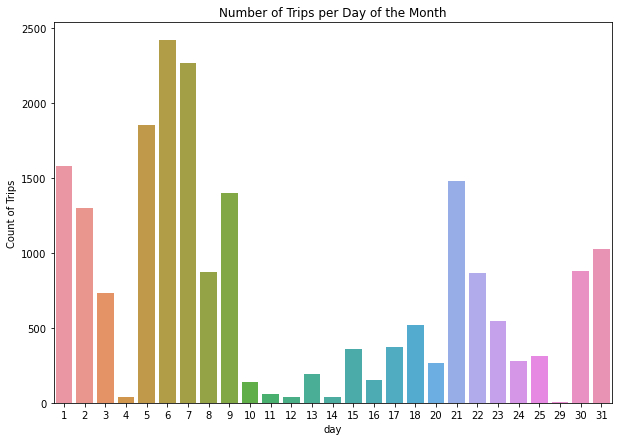

In [23]:
plt.figure(figsize=(10,7))
ax = sns.countplot(data=trips, x="day")
ax.set_title('Number of Trips per Day of the Month')
ax.set_ylabel('Count of Trips');

The beginning and end of the month is alot more busy than the rest of the month.

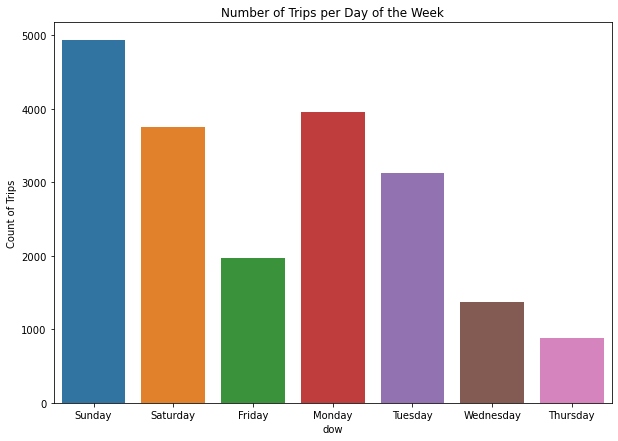

In [24]:
plt.figure(figsize=(10,7))
ax = sns.countplot(data=trips, x="dow")
ax.set_title('Number of Trips per Day of the Week')
ax.set_ylabel('Count of Trips');

Monday, Tuesday and the weekend are a lot busier than the rest of the week

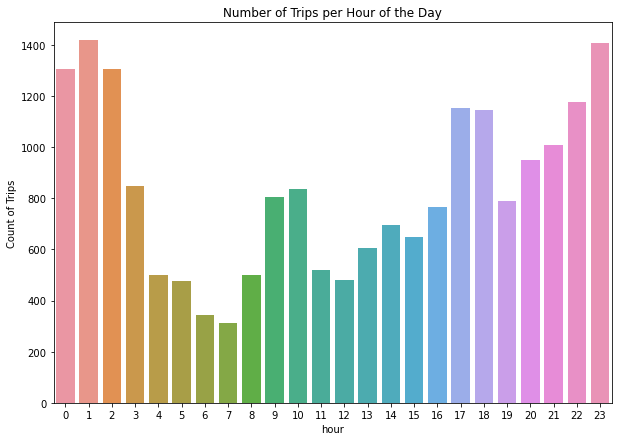

In [25]:
plt.figure(figsize=(10,7))
ax = sns.countplot(data=trips, x="hour")
ax.set_title('Number of Trips per Hour of the Day')
ax.set_ylabel('Count of Trips');

Post 4PM to around 2AM is the busiest time of day, with a relatively large amount of rides between 9AM-10AM

(c)

In [26]:
trips['payment_type'].value_counts()

Credit Card    17919
Cash            1446
No Charge        613
Dispute           14
Unknown            8
Name: payment_type, dtype: int64

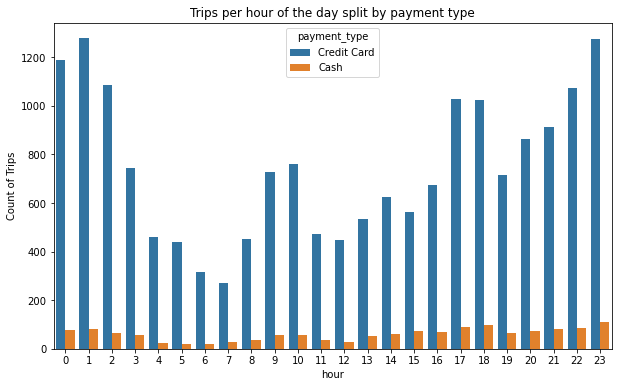

In [27]:
small_df = trips[trips['payment_type'].isin(['Credit Card', 'Cash'])]
plt.figure(figsize=(10,6))
ax = sns.countplot(x="hour", data=small_df, hue='payment_type')
ax.set_title("Trips per hour of the day split by payment type")
ax.set_ylabel('Count of Trips');

(d) Yes, there are quite significantly more rides paid by credit card versus cash.

## K-Nearest Neighbors

####Q4

**8 points** = $(1.5 + 2.5 + 2 + 2)$                

Consider the sample dataset given in the following table which represents samples from the selection for a certain tax-benefit scheme based on credit score (on 800) and annual income of individuals :

**Train set :**

Sample|Score (800)|Income($)|Result|
--|--|--|--|
T1|400|20000|Selected|
T2|200|2000|Rejected|
T3|600|10000|Selected|
T4|100|4000|Rejected|
T5|800|2000|Rejected|
T6|500|10000|Selected|


**Test set :**

Sample|Score (10)|Income($)|Result|
--|--|--|--|
A|200|12000|?|
B|600|2000|?|

(Note: The `Sample` column in the table is merely a unique name for each data sample to reference in the questions and your answers)

Consider a kNN model with k=1 and Euclidean L1 distance as the metric : $$L_1[(x_1, y_2) || (x_2, y_2)] = |x_1 - x_2| + |y_1 - y_2|$$

(a) For the two test samples `A` and `B`, determine the `Result` based on your manual fitting of the above model on the train set.

(b) In the raw data :
*  Convert the `Score` column as a percentage of the maximum possible credit score
*  Subtract the `Income` by the minimum income in the train set and divide the result by the minimum income again. 

Recalibrate your kNN model and determine the `Result` of the model for the predictions of the test samples `A` and `B`.    

(c) Do you see a potential issue with fitting raw data like this to the kNN model? What is a reasonable solution?

(d) You discover many more attributes (features) about the individuals that you can include in your dataset and fit a model. Is kNN still a good choice in this case? **Why/Why not?**

(a)

In [90]:
train = pd.DataFrame({
    "Sample":["T1","T2","T3","T4","T5","T6"],
    "Score":[400,200,600,100,800,500],
    "Income":[20000,2000,10000,4000,2000,10000],
    "Result":["Selected","Rejected","Selected","Rejected","Rejected","Selected"]})

In [91]:
test = pd.DataFrame({
    "Sample":["A","B"],
    "Score":[200, 600],
    "Income":[12000,2000],
    "Result":[None, None]})

In [92]:
train

,Sample,Score,Income,Result
0,T1,400,20000,Selected
1,T2,200,2000,Rejected
2,T3,600,10000,Selected
3,T4,100,4000,Rejected
4,T5,800,2000,Rejected
5,T6,500,10000,Selected


In [93]:
test

,Sample,Score,Income,Result
0,A,200,12000,None
1,B,600,2000,None


In [94]:
def l1_distance(p1, p2):
    """Return L1 distance between points p1=(x1,y1) and p2=(x2,y2)
    """
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

In [95]:
l1_dist_p1 = []
l1_dist_p2 = []
for x1, y1 in zip(train['Score'], train['Income']):
    l1_dist_p1.append(l1_distance(p1=[x1, y1], p2=[test['Score'][0], test['Income'][0]]))    
    l1_dist_p2.append(l1_distance(p1=[y1, y1], p2=[test['Score'][1], test['Income'][1]]))

test['Result'][0] = train['Result'][l1_dist_p1.index(min(l1_dist_p1))]
test['Result'][1] = train['Result'][l1_dist_p2.index(min(l1_dist_p2))]

In [96]:
l1_dist_p1

[8200, 10000, 2400, 8100, 10600, 2300]

In [97]:
l1_dist_p2

[37400, 1400, 17400, 5400, 1400, 17400]

In [98]:
test

,Sample,Score,Income,Result
0,A,200,12000,Selected
1,B,600,2000,Rejected


(b)

In [99]:
train['Score'] = train['Score'] / 800 * 100
test['Score'] = test['Score'] / 800 * 100

In [100]:
train['Income'] = (train['Income'] - min(train['Income'])) / min(train['Income'])
test['Income'] = (test['Income'] - min(test['Income'])) / min(test['Income'])

In [101]:
train

,Sample,Score,Income,Result
0,T1,50.0,9.0,Selected
1,T2,25.0,0.0,Rejected
2,T3,75.0,4.0,Selected
3,T4,12.5,1.0,Rejected
4,T5,100.0,0.0,Rejected
5,T6,62.5,4.0,Selected


In [102]:
test

,Sample,Score,Income,Result
0,A,25.0,5.0,Selected
1,B,75.0,0.0,Rejected


In [104]:
l1_dist_p1 = []
l1_dist_p2 = []
for x1, y1 in zip(train['Score'], train['Income']):
    l1_dist_p1.append(l1_distance(p1=[x1, y1], p2=[test['Score'][0], test['Income'][0]]))    
    l1_dist_p2.append(l1_distance(p1=[y1, y1], p2=[test['Score'][1], test['Income'][1]]))

test['Result'][0] = train['Result'][l1_dist_p1.index(min(l1_dist_p1))]
test['Result'][1] = train['Result'][l1_dist_p2.index(min(l1_dist_p2))]

In [105]:
l1_dist_p1

[29.0, 5.0, 51.0, 16.5, 80.0, 38.5]

In [106]:
l1_dist_p2

[75.0, 75.0, 75.0, 75.0, 75.0, 75.0]

In [107]:
test

,Sample,Score,Income,Result
0,A,25.0,5.0,Rejected
1,B,75.0,0.0,Selected


We note here that the predictions have been flipped and are not consistent with the preds in 4a

(c)

Yes, there is an issue with fitting raw data like ours into a KNN. This issue has to do with the magnitude of the features we are considering. Our case is a good example of such phenomenon. Income is roughly 10x the value of score and so when taking L1 distances, the distances are in large part influenced by the values of Income and minimally influenced by Score. We should normalize the data or scale it in a way where both variables considered are equally or similarly weighed in computing L1 distances for a more generalizable KNN model.

(d)

KNN suffers from the curse of dimensionality. Therefore, with more features and therefore higher dimension, KNN will be both more computationally expensive and yield poor results since it does not scale well. To add to this, we only have 6 training samples which wouldn't satisfy the demands of high dimensionality KNN (we would need the number of samples to increase with the number of dimensions to maintain a strong accuracy).

## Decision Trees

#### **Q5**

**5 points** = $(2.5 + 2.5)$

Consider the figure below :

  (a) Sketch the tree corresponding to the partition of the predictor space
illustrated in the left-hand panel. The numbers inside the boxes indicate the
mean of $Y$ within each region.                                                       

  (b) Create a diagram similar to the left-hand panel, using the tree illustrated in the right-hand panel. You should divide up the predictor space into the correct regions, and indicate the mean for each region.

<img width=600 src="https://i.ibb.co/PD3N5Zt/Trees.png" alt="Trees" border="0" /> 


(a), (b)

<img src="q5.jpg" alt="q5" width="350" height="477">

#### **Q6**

**13 points** = $(1 + 1 + 2 + 1.5 + 1.5 + 1.5 + 1.5 + 1 + 1 + 1)$                

Given below is a decision tree generated for a dataset with *150 samples* with :                             

*   features : `['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']`
*   target class labels : `['setosa', 'versicolor', 'virginica']`

The dataset consists of 50 samples per class.

<img width=650 src="https://i.ibb.co/gyLNf1v/decision-tree-figure.png" alt="Trees" border="0" /> 

Based on this particular decision tree, answer the following questions:

(a) Which among the 4 features do you think is the least significant in determining the class of the input data? **Why**?

If we base ourselves on Gini Importance or Mean Decrease in Impurity, which take a weighted average (# samples) of the number of times a feature is used to split a node, "petal length (cm)" is the most significant feature

(b) Which among the 4 features do you think is the most important in determining the class of the input data? **Why**?

By the same logic as in (a), "sepal width (cm)" is the least significant feature.

(c) For each of the 3 classes, give approximate ranges of the feature values that are characteristic of the class based on the region in the partition space where a sample would **most likely occur** in the feature space (compared to other partitions). 
(Note: Need not specify all 4 features, only those that help identify the *most likely feature characteristics* are sufficient) 

Setosa
- petal length (cm) <= 2.45 cm

Versicolor 
- 2.45 < petal length (cm) <= 4.75 cm AND
- petal width (cm) <= 1.75

Virginica: 
- petal length (cm) > 4.75 AND
- petal width (cm) > 1.75

(d) Why do some nodes have a gini index of 0 while the others do not?

A gini index of 0 signifies perfect classification. Therefore, the nodes with a 0 gini index contain a single class.

(e) What are the possible class(es) you classify the flowers with the following description into?:
1.  smaller sepals and petals  (width and length < 3.5)
2.  longer sepals and wider petals (petals wider than 2 cm)   

1. Setosa or versicolor but more likely setosa
2. Virginica or versicolor but more likely virginica

(f) The field `value` actually represents the *number of samples of each class* `[#sentosa_samples, #versicolor_samples, #virginica_samples]` classified by the tree based on the given training dataset with 150 samples. With this in mind, determine the **number of samples in the training dataset that were classified into each class**. (`[setosa, versicolor, virginica] = [__, __, __]`)

`[setosa, versicolor, virginica] = [50, 33+1+18, 11+37]` therefore `[50, 52, 48]`

(g) What is the *class-wise training accuracy* of the classification done by this tree? (training accuracy of each class)

- Setosa: 50/50 = 100%
- Versicolor: 49/50 = 100%
- Virginica: 47/50 = 100%

(h) What is the *overall training accuracy* of this model?

- Overall: 146/150 = 97.3%

(i) Do you think that this tree is overfitting the data? How would you determine it?  

Yes. One clear indicator is the presence of a split where the resulting node (leaf node) has a single observation. It is likely that when applied to a different dataset, this split will not yield perfect classification.

To determine this, we would have to use a test our model on an independent/never before seen test set.

(j) If you were required to fit a decision tree with lower variance, what change would you propose in the above tree?

I would try to enforce less splits (i.e. lower max tree depth) and a minimum number of nodes per node. (These are available hyperparameters in many library implementations of decision trees.

## Linear Regression

####**Q7**

**12 points** = $(1 + 2 + 1 + 2 + 1.5 + 1.5 + 2 + 1)$                           

You are building a model of bike rental demand, to help a city plan its
transit services. After analyzing the dataset, you make the following plot,

  <img width=600 src="https://i.ibb.co/n3Tpy6J/bike-rentals-by-time-of-day.png"/>

  The x-axis shows the time of day ($x$), and the y-axis gives the **average** number of bike rentals ($\bar{y}$), both of which are derived from a dataset containing the instantaneous number bike rentals at a city location for different times of the day with the resolution in minutes. Note that you only plot the average number of bike rentals for the purpose of visualization. For fitting a model, you use the raw $x$ and $y$ available in the dataset.  

The software architects of this project are very persistent on using a linear model for this demand prediction due to computational constraints and to ensure swift processing. Answer the following questions based on this.

  (a) You first feel the impulse to fit the model, $$y
= \beta x + \epsilon.$$ Is it a good idea to do so? Why/Why not? 

The model suggested is linear. Taking a look at the trends in our data we quickly notice that our data as various non-linear patterns. (i.e. weekend rentals between 6am and 10pm - quadratic)

  (b) Propose a good way to represent the time of day feature variable (x-axis) to include in the regression. **Justify** your choice.

We can represent time of day as a continuous integer value, representing the number of minutes elapsed since the beginning of the day or 12AM. 

I chose this scale because it is granular enough to allow us to detect intricate trends in our data while not being overly granular as something like the number of seconds elapsed since the start of the day would be. In that case we would end up focusing on extremely subtle trends and eventually overfit.

  (c) A data scientist in your team proposes to include an additional feature variable $x_d$ which is set to 1 for *weekday* (Mon-Fri) and 0 for *weekend* (Sat-Sun). Explain what could possibly be the basis of this choice.  

A reason to include this variable could be to serve as an indicator for when we are in the weekday or the weekend. This could act in the form of a constant multiplying a piecewise function that will influence a model of the weekday trend and not the weekend trend.

  (d) You fit a linear model for the dataset that is augmented with the addition variable $x_d$ as proposed in (c) above as $y = \beta x + \beta_d x_d + \epsilon$. The regression coefficient of this model is $\beta_d$. Intuitively explain what the parameter $\beta_d$ would end up representing in **this specific** fitted linear model.  

We can create a system of equations and solved for $\beta_d$. $$y_{weekday}=\beta x + \beta_d x_d + \epsilon = \beta x + \beta_d + \epsilon$$ and $$y_{weekend}=\beta x + \beta_d (0) + \epsilon = \beta x + \epsilon $$ Isolating $\beta_d$, we get; $$\beta_d = y_{weekday} - y_{weekend}$$ In other words, $\beta_d$ represents the difference between the number of predicted bike rentals during the week and weekend.

  (e) When a linear model is fit separately for the *weekday* and *weekend* data, which one among the two (weekday/weekend) will produce a better fit model? Why?

A linear model would be better suited for the weekday data since it is generally upward trending except for the dip in usage around 10AM and 10PM. 

Weekend data has a quadratic form and a linear model will be extremely ill-suited to model that.

  (f) For the **weekend** data, you realize that you can split the input domain into specific ranges and fit separate linear models to get better results. Outline a good possible set of ranges to split the input for the *weekend* data. 

]6AM, 2PM] and ]2PM, 6AM]. These have been selected due to these ranges covering rental trends that a monotonic. (Both increasing and decreasing) Which would be a suitable data candidate for a linear model.

  (g) Motivated by this approach, you realize you can include basis functions in your
regression even for the **weekday** data. Suggest one possible set of basis functions you might include in this regression. What is the idea behind your choice?

sin(x) would be a very good basis choice due to its cyclical nature. We have 2 large peaks per period and we start the day (5AM) at a low value.

  (h) Describe one way that you would use to avoid your linear model from overfitting the bike rental data.

We can regularize our linear model as well as use a validation and test set for model evaluation (test set only being used at the absolute end of our model pipeline for benchmarking, independent of all train and validation set usage).

In [111]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

/usr/local/bin/bash: apt-get: command not found
  Created wheel for pypandoc: filename=pypandoc-1.5-py3-none-any.whl size=17037 sha256=dcee012c7d290cf6c74ae3eb12c14fedb96fa2919078576bc94d777bb9587bd8
  Stored in directory: /Users/Matteo/Library/Caches/pip/wheels/27/01/d8/dde8d4ae5c2a6e6dda11cee8c4fb855c9f60f1f8cdc1332cef
Successfully built pypandoc


In [ ]:
!jupyter nbconvert --to latex drive/My\ Drive/Colab\ Notebooks/IFT-6758\ HW-1.ipynb